In [319]:
import tensorflow as tf

print(tf.__version__)
print(tf.keras.__version__)
from matplotlib import pyplot as plt
import os
import random
import matplotlib.pyplot as pltBVGGBHBNM
import os

import time
import PIL.Image as Image
from IPython.display import Image, display
import matplotlib.cm as cm
import numpy as np
from datetime import datetime
from datetime import datetime

2.12.0
2.12.0


In [320]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest",
)

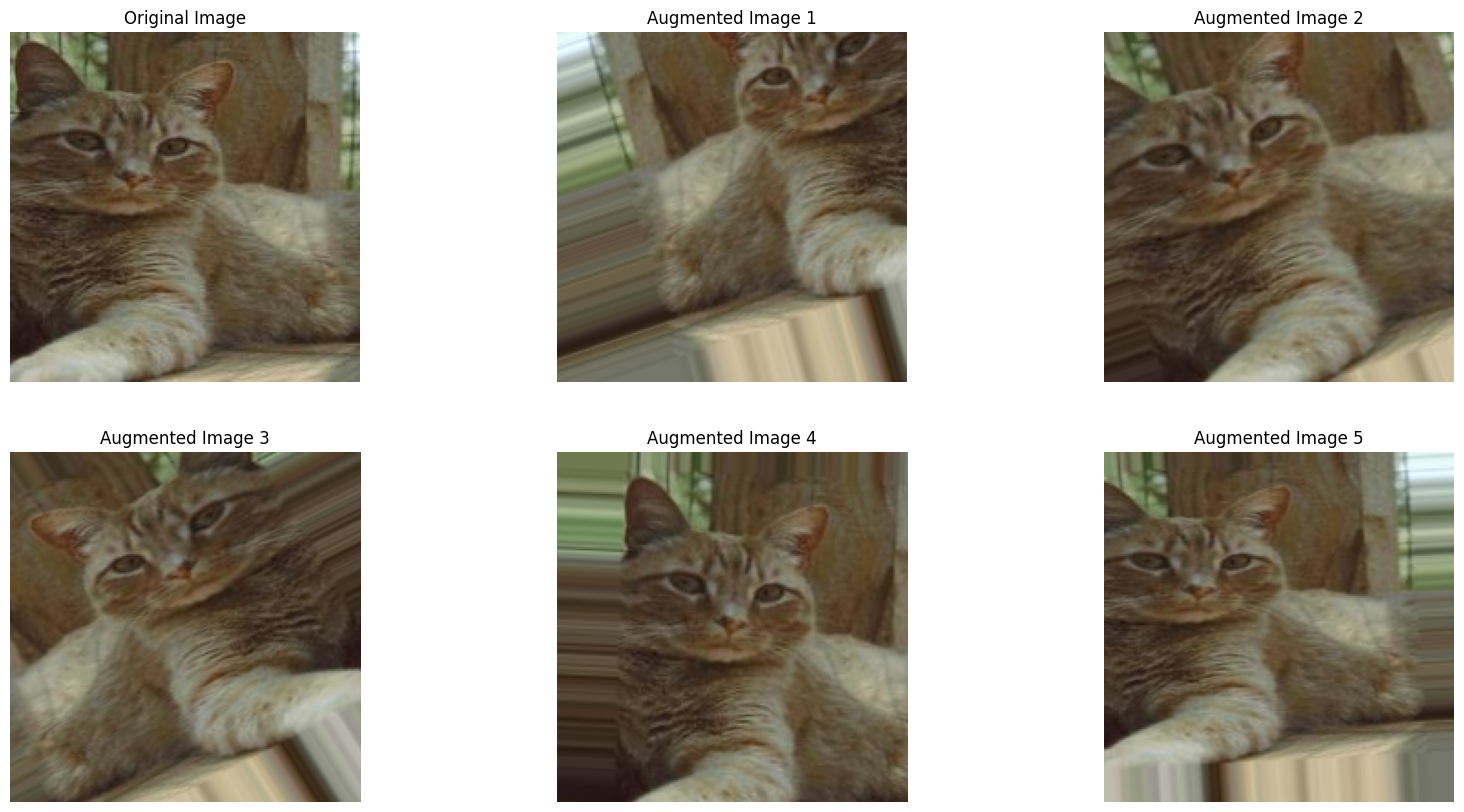

In [321]:
fig, ax = plt.subplots(2,3,figsize=(20,10))
all_images = []

dog_image_dir = 'Dataset/PetImages/Train/Cat/'
dog_images = []
_, _, dog_images = next(os.walk('Dataset/PetImages/Train/Cat/'))
            
random_img = random.sample(dog_images,1)[0]
random_img = plt.imread('Dataset/PetImages/Train/Cat/'+random_img)
all_images.append(random_img)

random_img = random_img.reshape((1,)+random_img.shape)
sample_augmented_images = image_generator.flow(random_img)

for _ in range(5):
    augmented_imgs = sample_augmented_images.next()
    for img in augmented_imgs:
        all_images.append(img.astype('uint8'))

for idx, img in enumerate(all_images):
    ax[int(idx/3),idx%3].imshow(img)
    ax[int(idx/3),idx%3].axis('off')
    if idx == 0:
        ax[int(idx/3), idx%3].set_title('Original Image')
    else: 
        ax[int(idx/3), idx%3].set_title('Augmented Image {}'.format(idx))

plt.show()


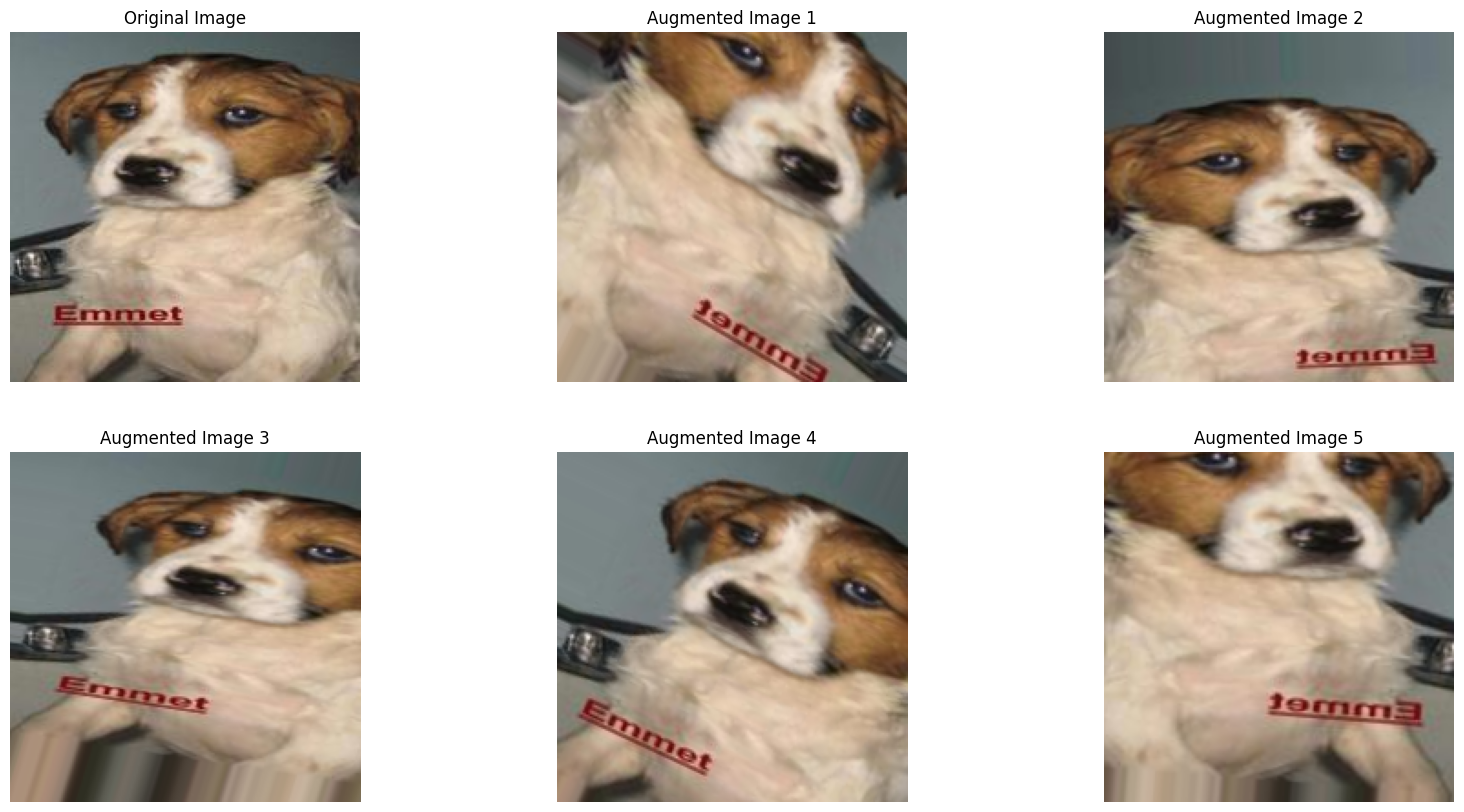

In [322]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
all_images = []

dog_image_dir = "Dataset/PetImages/Train/Dog/"
dog_images = []
_, _, dog_images = next(os.walk("Dataset/PetImages/Train/Dog/"))

random_img = random.sample(dog_images, 1)[0]
random_img = plt.imread("Dataset/PetImages/Train/Dog/" + random_img)
all_images.append(random_img)

random_img = random_img.reshape((1,) + random_img.shape)
sample_augmented_images = image_generator.flow(random_img)

for _ in range(5):
    augmented_imgs = sample_augmented_images.next()
    for img in augmented_imgs:
        all_images.append(img.astype("uint8"))

for idx, img in enumerate(all_images):
    ax[int(idx / 3), idx % 3].imshow(img)
    ax[int(idx / 3), idx % 3].axis("off")
    if idx == 0:
        ax[int(idx / 3), idx % 3].set_title("Original Image")
    else:
        ax[int(idx / 3), idx % 3].set_title("Augmented Image {}".format(idx))

plt.show()

In [338]:
INPUT_SIZE = 32
MAXPOOL_SIZE = 2
BATCH_SIZE = 32
IMAGE_SIZE = (192, 192)



train_dataset = tf.keras.utils.image_dataset_from_directory(
    "Dataset/PetImages/Train/",
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=True,
    seed=999,
    validation_split=0.20,
    class_mode='categorical'
    subset="training",
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    "Dataset/PetImages/Train/",
    batch_size=BATCH_SIZE,
    image_size=IMAGE_SIZE,
    shuffle=False,
    seed=999,
    validation_split=0.20,
    class_mode='categorical'
    subset="validation",
)
class_names = train_dataset.class_names

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2668094596.py, line 15)

In [324]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [326]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [327]:
with tf.device('/cpu:0'):
    data_augmentation = tf.keras.Sequential([
        tf.keras.layers.RandomFlip('horizontal_and_vertical'),
        tf.keras.layers.RandomRotation(0.3),
        tf.keras.layers.RandomZoom(0.2)
    ])

In [328]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [329]:

IMG_SHAPE = IMAGE_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMG_SHAPE, include_top=False, weights="imagenet"
)

In [330]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 6, 6, 1280)


In [331]:
try:
    image_batch, label_batch = next(iter(train_dataset))

except Exception as e:
    print(f"Error processing image: {e}")
    
feature_batch = base_model(image_batch)
print(feature_batch.shape)
base_model.trainable = False

(32, 6, 6, 1280)


In [332]:
base_model.summary()

Model: "mobilenetv2_1.00_192"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_27 (InputLayer)          [(None, 192, 192, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 96, 96, 32)   864         ['input_27[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 96, 96, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 96, 96, 32)   0           ['bn_Conv1[0][

In [313]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x) 
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x) 
model = tf.keras.Model(inputs, outputs)

In [333]:
base_learning_rate = 0.0001
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"],
)

In [334]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 192, 192, 3)]     0         
                                                                 
 sequential_20 (Sequential)  (None, 192, 192, 3)       0         
                                                                 
 tf.math.truediv_9 (TFOpLamb  (None, 192, 192, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_9 (TFOpLam  (None, 192, 192, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                           

In [335]:
initial_epochs =20

loss0, accuracy0 = model.evaluate(validation_dataset)

32/32 [==============================] - 15s 432ms/step - loss: 0.4781 - accuracy: 0.7998


In [336]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 0.48
initial accuracy: 0.80


In [337]:
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=validation_dataset)

Epoch 1/20
155/155 [==============================] - 93s 585ms/step - loss: 0.4906 - accuracy: 0.7734 - val_loss: 0.2807 - val_accuracy: 0.9329
Epoch 2/20
155/155 [==============================] - 90s 579ms/step - loss: 0.3903 - accuracy: 0.8281 - val_loss: 0.2029 - val_accuracy: 0.9596
Epoch 3/20
155/155 [==============================] - 90s 581ms/step - loss: 0.3436 - accuracy: 0.8537 - val_loss: 0.1643 - val_accuracy: 0.9625
Epoch 4/20
155/155 [==============================] - 90s 578ms/step - loss: 0.3167 - accuracy: 0.8652 - val_loss: 0.1388 - val_accuracy: 0.9675
Epoch 5/20
155/155 [==============================] - 90s 581ms/step - loss: 0.3019 - accuracy: 0.8642 - val_loss: 0.1259 - val_accuracy: 0.9684
Epoch 6/20
155/155 [==============================] - 91s 588ms/step - loss: 0.2911 - accuracy: 0.8765 - val_loss: 0.1198 - val_accuracy: 0.9675
Epoch 7/20
155/155 [==============================] - 95s 613ms/step - loss: 0.2800 - accuracy: 0.8799 - val_loss: 0.1139 - val_ac

In [339]:

date = datetime.now().strftime('%Y%m%d%H%M%S')
model.save('model/my_model' + date + '.h5') # creates a HDF5 file

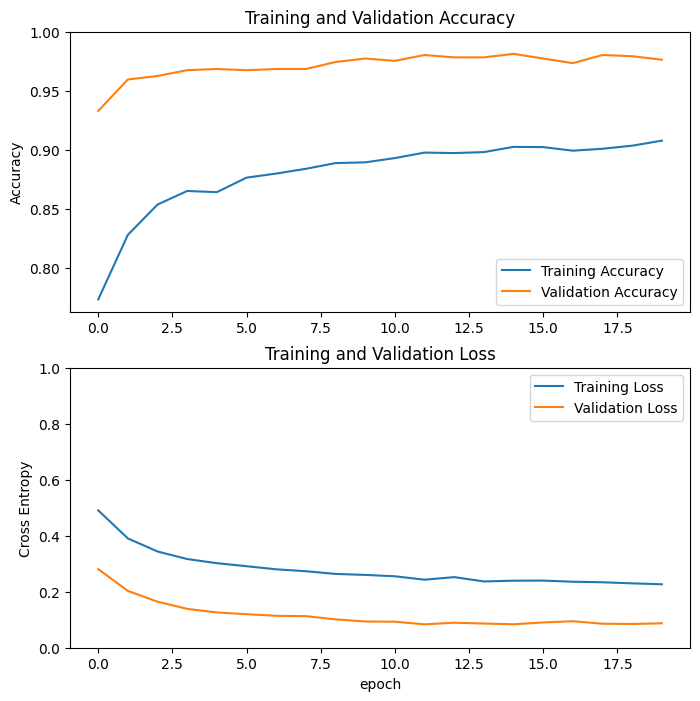

In [340]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [341]:
base_model.trainable = True
print(base_model.trainable)

print("Number of layers in the base model: ", len(base_model.layers))

fine_tune_at = -10

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

True
Number of layers in the base model:  154


In [342]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [343]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 192, 192, 3)]     0         
                                                                 
 sequential_20 (Sequential)  (None, 192, 192, 3)       0         
                                                                 
 tf.math.truediv_9 (TFOpLamb  (None, 192, 192, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_9 (TFOpLam  (None, 192, 192, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_192 (Funct  (None, 6, 6, 1280)       2257984   
 ional)                                                          
                                                           

In [357]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 20/30
155/155 [==============================] - 90s 583ms/step - loss: 0.2222 - accuracy: 0.9074 - val_loss: 0.0815 - val_accuracy: 0.9822
Epoch 21/30
155/155 [==============================] - 89s 575ms/step - loss: 0.2271 - accuracy: 0.9068 - val_loss: 0.0794 - val_accuracy: 0.9832
Epoch 22/30
155/155 [==============================] - 96s 620ms/step - loss: 0.2222 - accuracy: 0.9062 - val_loss: 0.0825 - val_accuracy: 0.9813
Epoch 23/30
155/155 [==============================] - 95s 613ms/step - loss: 0.2306 - accuracy: 0.9033 - val_loss: 0.0753 - val_accuracy: 0.9842
Epoch 24/30
155/155 [==============================] - 99s 637ms/step - loss: 0.2298 - accuracy: 0.9036 - val_loss: 0.0864 - val_accuracy: 0.9803
Epoch 25/30
155/155 [==============================] - 98s 631ms/step - loss: 0.2266 - accuracy: 0.9108 - val_loss: 0.0791 - val_accuracy: 0.9813
Epoch 26/30
155/155 [==============================] - 98s 635ms/step - loss: 0.2126 - accuracy: 0.9171 - val_loss: 0.0858 -

In [358]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

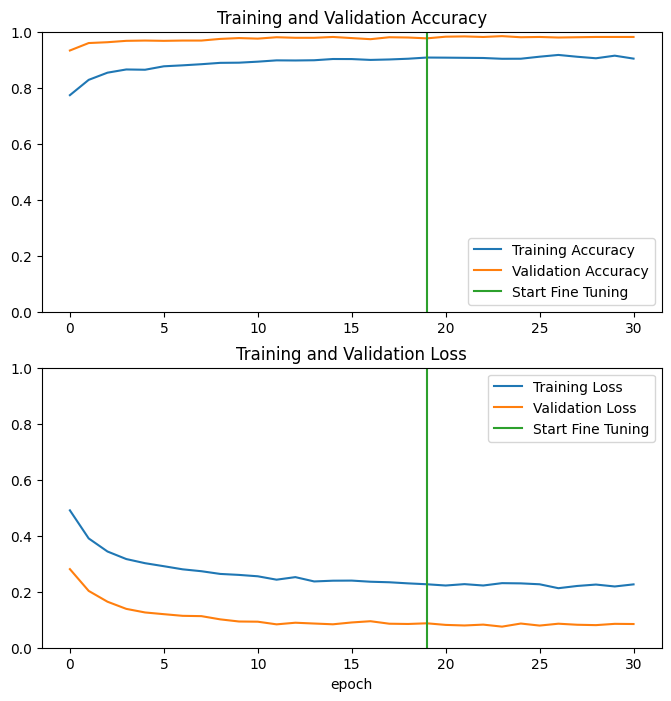

In [359]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [360]:
loss, accuracy = model.evaluate(test_dataset)
print('Test accuracy :', accuracy)

7/7 [==============================] - 4s 481ms/step - loss: 0.1149 - accuracy: 0.9732
Test accuracy : 0.9732142686843872


Predictions:
 [0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0]
Labels:
 [0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0]


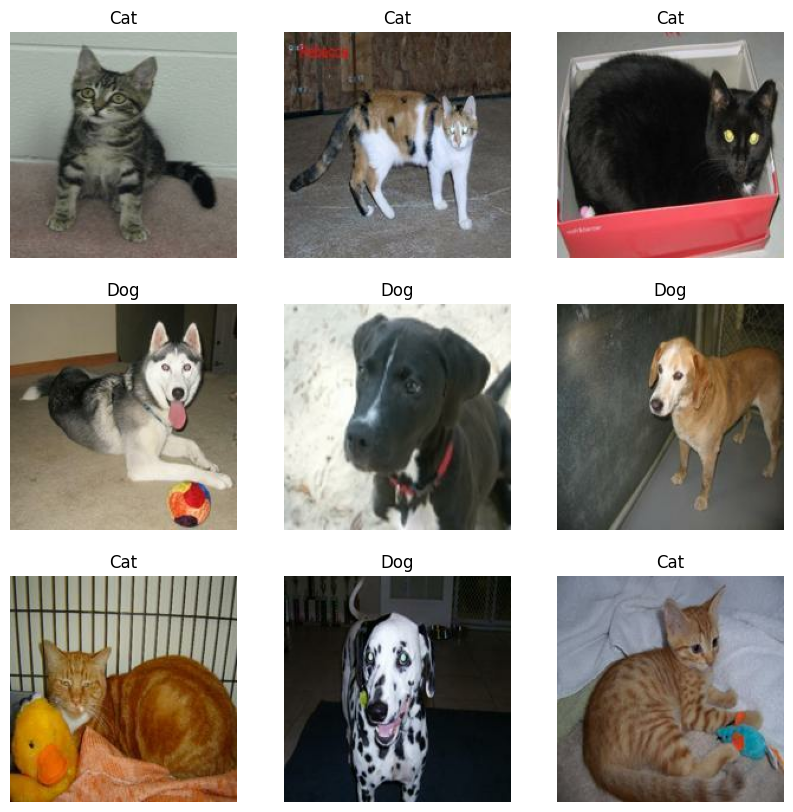

In [361]:
# Retrieve a batch of images from the test set
image_batch, label_batch = test_dataset.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch).flatten()

predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

This image most likely belongs to Dog.


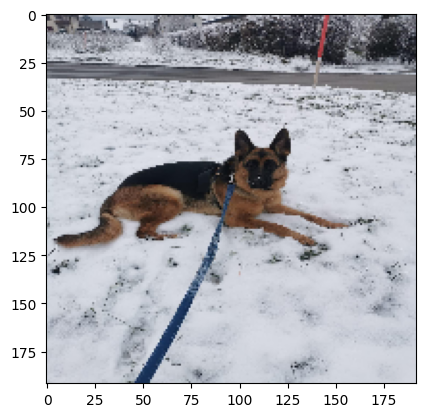

In [362]:
img = tf.keras.utils.load_img("Dataset/PetImages/Mydog/3.jpg", target_size=(192,192)#Image of my Dog, wich was wether in Test nor Validation dataset
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)


prediction = model.predict_on_batch(img_array).flatten()

prediction = tf.where(prediction < 0.5, 0, 1)


print(
    "This image most likely belongs to {}."
    .format(class_names[prediction[0]])
)

plt.imshow(img)